Reading tensor from HDF5 file...
Loaded tensor shape: (8, 653, 573, 10)
Loaded tensor dtype: float32
Visualizing the tensor...
Visualization saved as 'population_tensor_visualization.png'.


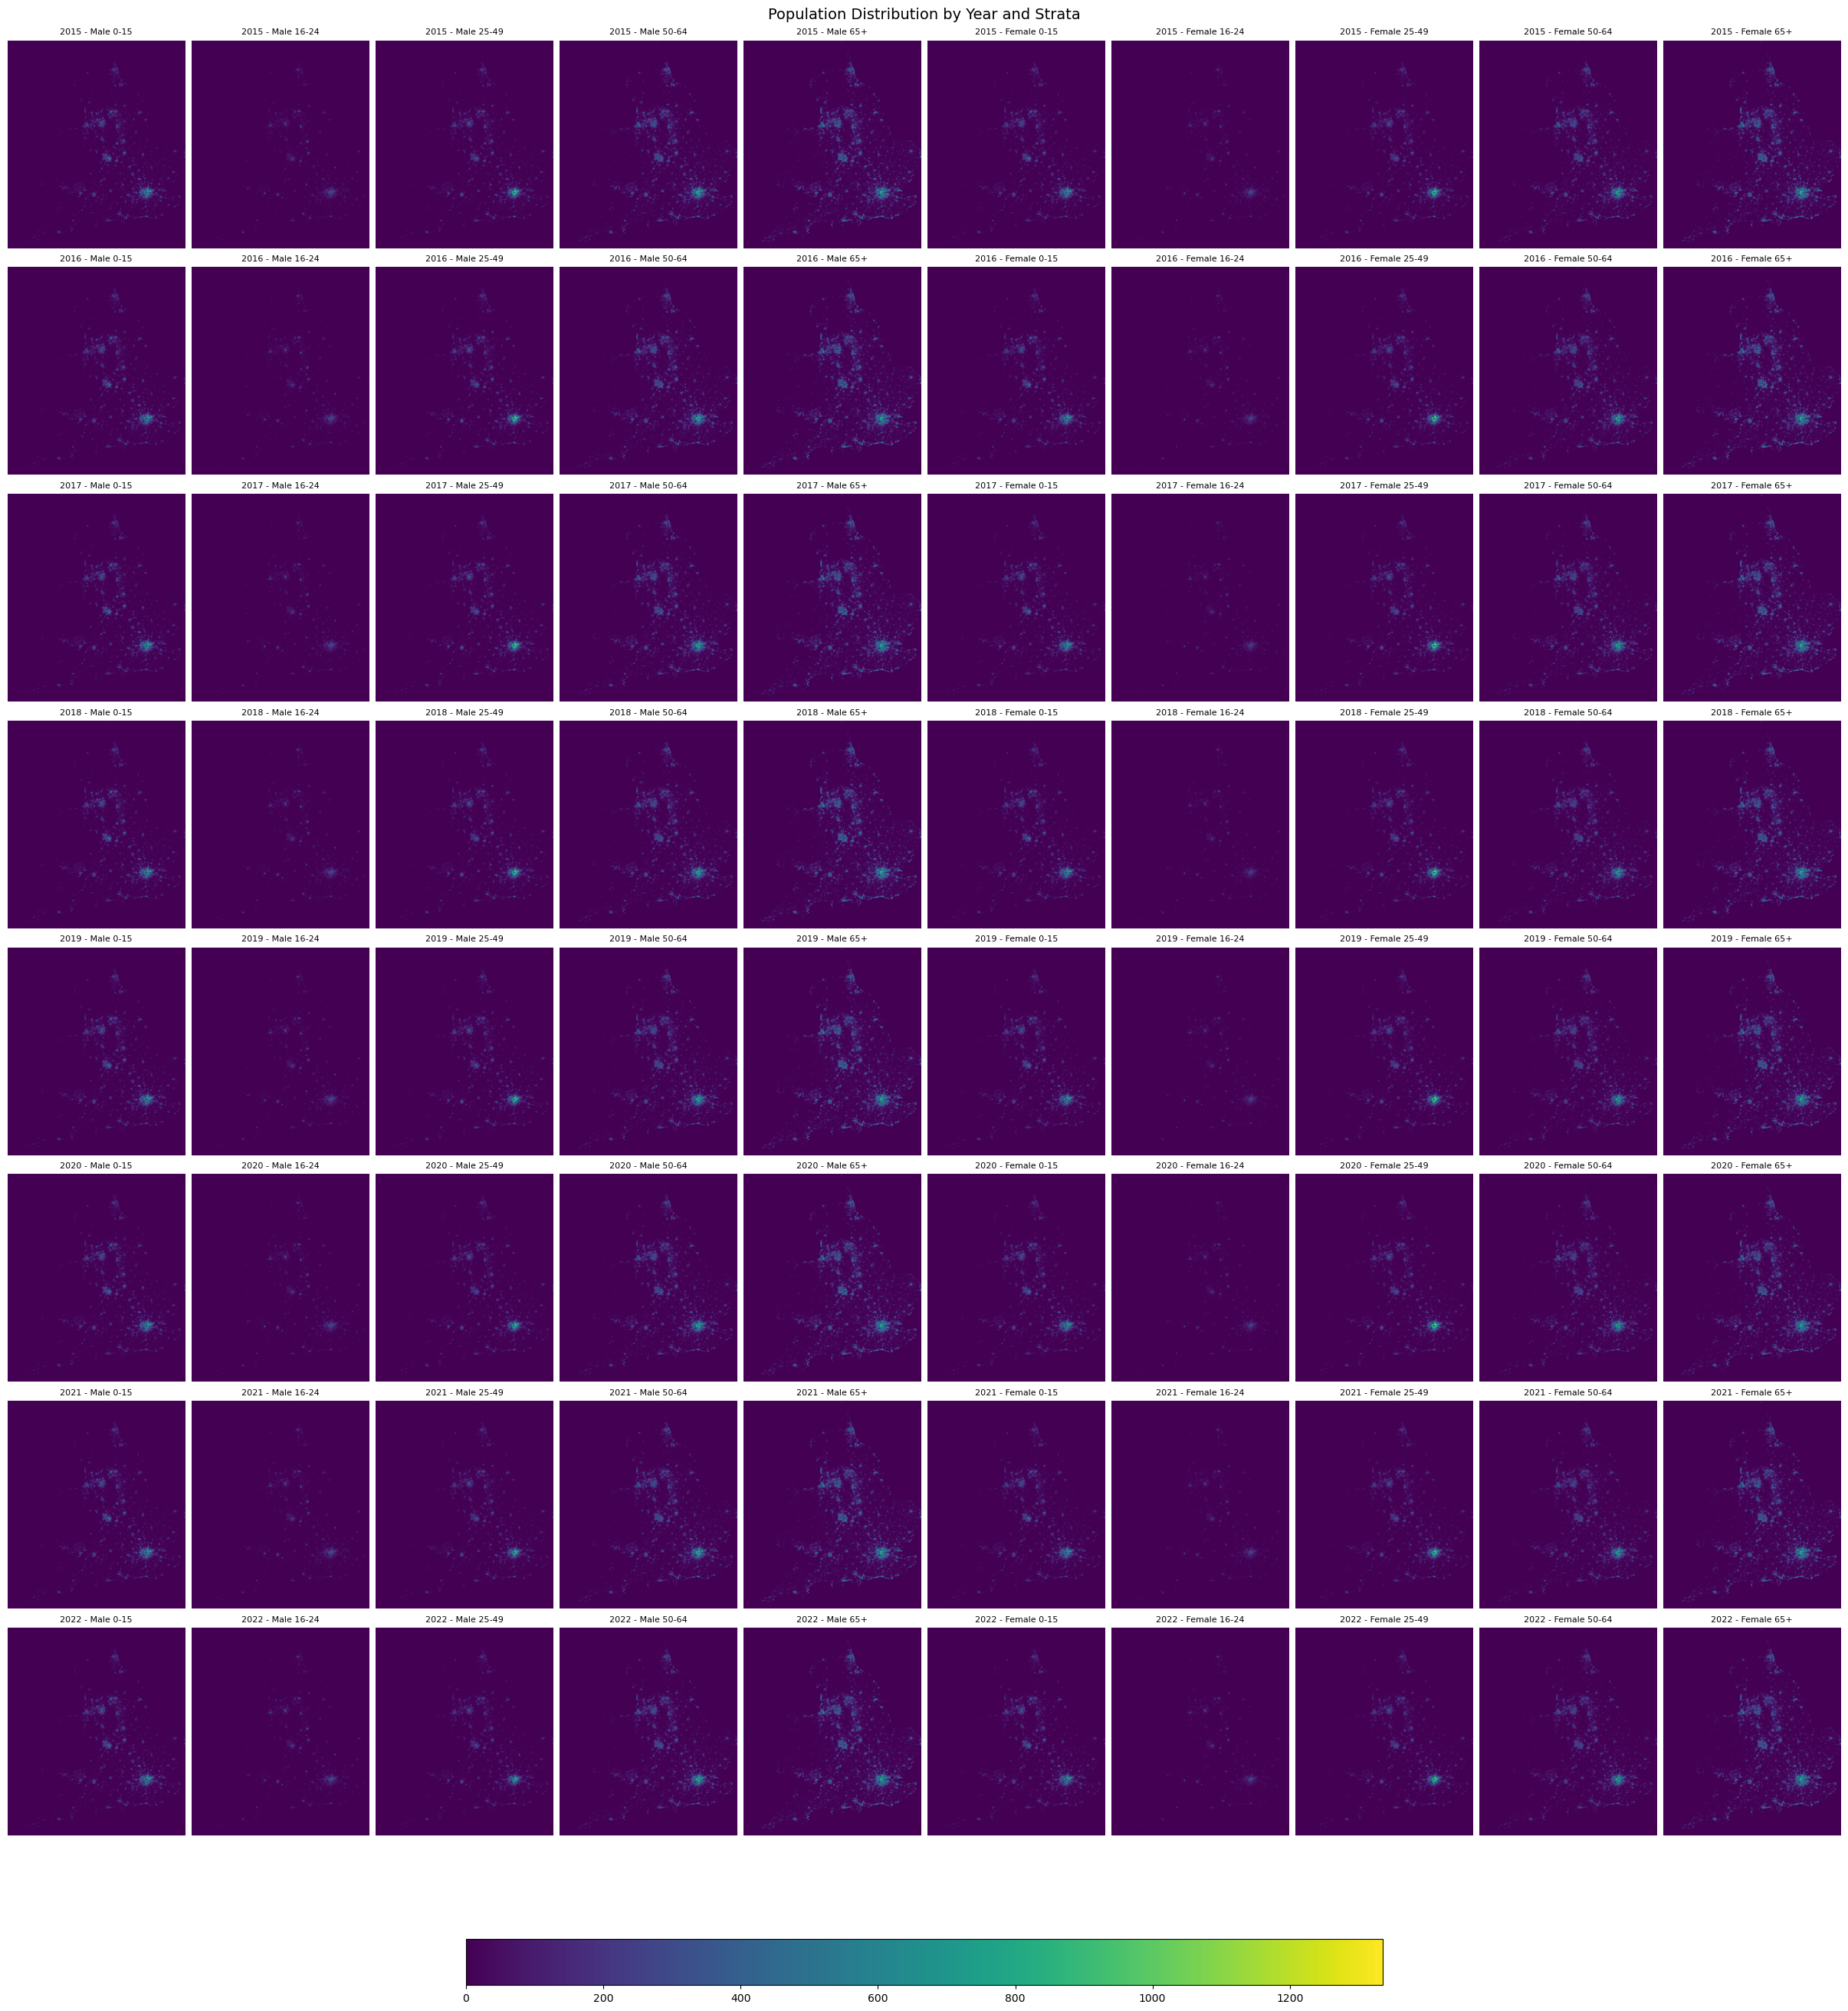

In [4]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Paths
OUTPUT_FILE = 'population_tensor.h5'

# Define labels for the years and strata
YEARS = list(range(2015, 2023))  # 8 years
STRATA = [
    'Male 0-15', 'Male 16-24', 'Male 25-49', 'Male 50-64', 'Male 65+',
    'Female 0-15', 'Female 16-24', 'Female 25-49', 'Female 50-64', 'Female 65+'
]

# Read the HDF5 file
print("Reading tensor from HDF5 file...")
with h5py.File(OUTPUT_FILE, 'r') as h5f:
    population_tensor = h5f['population_tensor'][:]
    print(f"Loaded tensor shape: {population_tensor.shape}")
    print(f"Loaded tensor dtype: {population_tensor.dtype}")

NUM_YEARS, NUM_ROWS, NUM_COLS, NUM_STRATA = population_tensor.shape

# Create subplots
fig, axes = plt.subplots(
    nrows=NUM_YEARS, ncols=NUM_STRATA, figsize=(24, 26),
    constrained_layout=True
)

# Visualization
print("Visualizing the tensor...")
for year_idx, year in enumerate(YEARS):
    for strata_idx, strata in enumerate(STRATA):
        ax = axes[year_idx, strata_idx]
        # Extract the grid for the current year and strata
        data = population_tensor[year_idx, :, :, strata_idx]
        
        # Plot the grid data
        im = ax.imshow(data, cmap='viridis', aspect='auto')
        ax.set_title(f"{year} - {strata}", fontsize=8)
        ax.axis('off')

# Add a colorbar
fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal', shrink=0.5)

# Save the plot to a file
plt.suptitle("Population Distribution by Year and Strata", fontsize=14)
plt.savefig("population_tensor_visualization.png", dpi=300)
print("Visualization saved as 'population_tensor_visualization.png'.")

# Show the plot
plt.show()